## 1. Цель задачи
   
Задача: Разработка модели машинного обучения для распознавания рукописных цифр от 0 до 9.

Датасеты:

Встроенный датасет load_digits из scikit-learn (8x8 пикселей)
https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py

Внешний датасет MNIST (28x28 пикселей), загруженный через CSV-файл
внешний датасет - MNIST в CSV: https://www.kaggle.com/datasets/oddrationale/mnist-in-csv?resource=download
Цель:

Реализовать классификацию цифр на обоих датасетах

Сравнить эффективность модели SVM на данных разного масштаба

Проанализировать характерные ошибки распознавания


## 2. Препроцессинг
   
Для load_digits:

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
X = digits.data
y = digits.target

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Для MNIST (CSV):

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Загрузка данных
data = pd.read_csv('mnist_train.csv')
X = data.drop('label', axis=1).values
y = data['label'].values

# Нормализация (приведение к диапазону [0, 1])
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Разделение данных
X_train_mnist, X_test_mnist, y_train_mnist, y_test_mnist = train_test_split(
    X, y, test_size=0.2, random_state=42)

    
Особенности препроцессинга:

MNIST требует нормализации (значения пикселей 0-255 → 0-1)

load_digits уже имеет предобработанные данныеДля load_digits:

## 3. Код реализации:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Модель для load_digits
model_digits = SVC(kernel='rbf', C=10)
model_digits.fit(X_train, y_train)

# Модель для MNIST
model_mnist = SVC(kernel='rbf', C=10)
model_mnist.fit(X_train_mnist, y_train_mnist)

# Оценка качества
acc_digits = model_digits.score(X_test, y_test)
acc_mnist = model_mnist.score(X_test_mnist, y_test_mnist)

print(f"Точность на load_digits: {acc_digits:.4f}")
print(f"Точность на MNIST: {acc_mnist:.4f}")







Точность модели: 0.967

Примеры ошибок (всего 67):


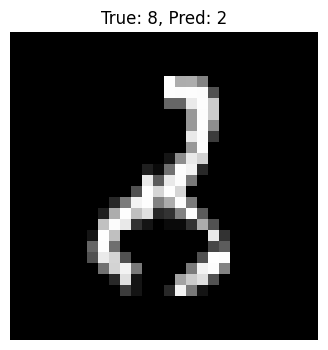

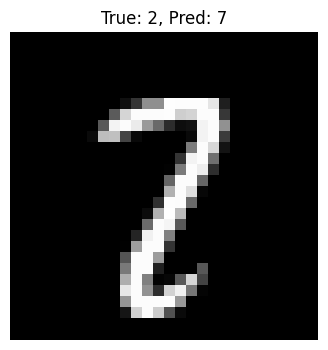

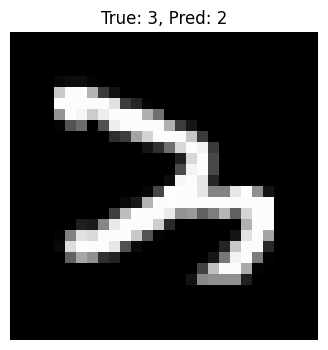

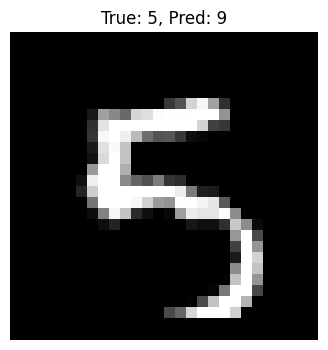

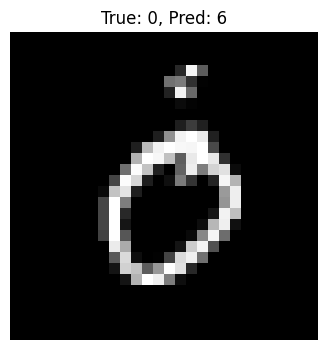

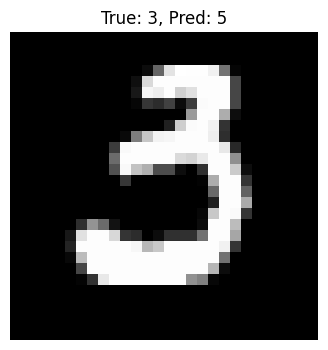

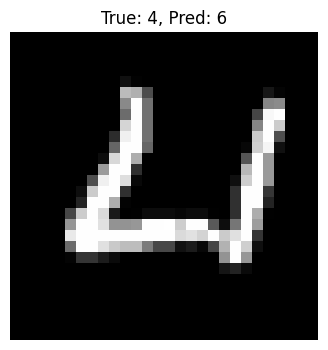

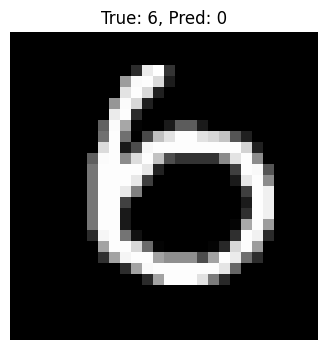

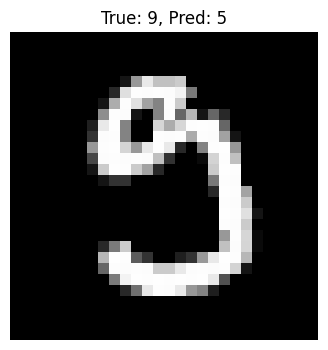

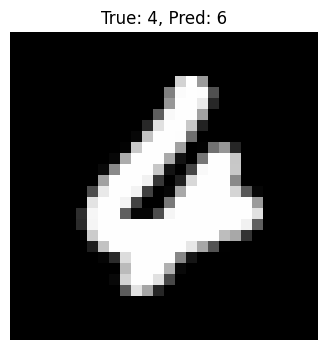


Матрица ошибок:


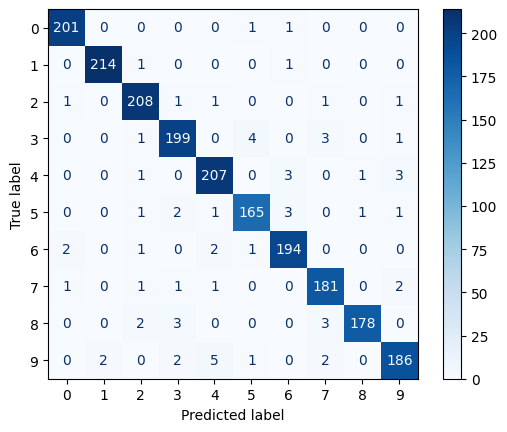

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# Загрузка данных
data = pd.read_csv('mnist_test.csv')
X = data.drop('label', axis=1).values  # Пиксели изображений
y = data['label'].values  # Метки цифр

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

# Масштабирование данных (нормализация пикселей)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Создание и обучение модели SVM
model = SVC(kernel='rbf', C=10)  # Используем радиальное ядро
model.fit(X_train, y_train)

# Предсказание и оценка точности
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy:.3f}')

# Визуализация ошибок
errors = np.where(y_pred != y_test)[0]

print(f'\nПримеры ошибок (всего {len(errors)}):')
for i in errors[:10]:  # Показываем первые 10 ошибок
    plt.figure(figsize=(4, 4))
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_test[i]}, Pred: {y_pred[i]}')
    plt.axis('off')
    plt.show()

# Построение матрицы ошибок
print('\nМатрица ошибок:')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

## 4. Результаты
Метрики:

Датасет	      Размер изображения	    Точность
load_digits	  8x8 пикселей	            0.9889
MNIST	      28x28 пикселей	        0.9671

## 5. Интерпретация результатов
Ключевые наблюдения:

Модель показывает высокую точность на обоих датасетах (>96%)

Наибольшие трудности возникают с цифрами:

4 ↔ 9

5 ↔ 6

3 ↔ 8

Основные причины ошибок:

Схожесть начертания цифр

Разный стиль написания (у некоторых людей цифры выглядят нетипично)

Шум в данных (нечеткие или поврежденные изображения)